In [1]:
import urllib.request
from skimage import io

import dask.array as da
from dask import delayed

from matplotlib import pyplot as plt
%matplotlib inline

In [9]:
# create a list of paths to call

# hide address before committing!!!!

# base_url = 'http://**************/org/oceanobservatories/rawdata/files/RS03ASHS/PN03B/06-CAMHDA301/2016/09/01/CAMHDA301-20160901T000000Z.mov/frame/'

base_url = 'http://104.199.125.32/org/oceanobservatories/rawdata/files/RS03ASHS/PN03B/06-CAMHDA301/2016/09/01/CAMHDA301-20160901T000000Z.mov/frame/'

list_urls = [base_url+str(frame) for frame in range(1000,1200,5)]

In [10]:
# reading a single image to get the dimensions
image = io.imread(list_urls[0])
print(image.dtype)
print(image.shape)

uint8
(1080, 1920, 3)


In [11]:
imread =  delayed(io.imread, pure=True)
lazy_values = [imread(url) for url in list_urls]
arrays = [da.from_delayed(lazy_value, dtype=image.dtype, shape=image.shape) for lazy_value in lazy_values]
stack = da.stack(arrays, axis=0)
print(stack.shape)
print(type(stack))

(40, 1080, 1920, 3)
<class 'dask.array.core.Array'>


In [12]:
%%time
temporal_mean = stack.mean(axis = (1,2,3)).compute()

CPU times: user 6.43 s, sys: 1.8 s, total: 8.23 s
Wall time: 1min 12s


In [13]:
%%time
temporal_var = stack.var(axis = (1,2,3)).compute()

RemoteDisconnected: Remote end closed connection without response

Traceback
---------
  File "/home/val/anaconda3/lib/python3.5/site-packages/dask/async.py", line 268, in execute_task
    result = _execute_task(task, data)
  File "/home/val/anaconda3/lib/python3.5/site-packages/dask/async.py", line 248, in _execute_task
    args2 = [_execute_task(a, cache) for a in args]
  File "/home/val/anaconda3/lib/python3.5/site-packages/dask/async.py", line 248, in <listcomp>
    args2 = [_execute_task(a, cache) for a in args]
  File "/home/val/anaconda3/lib/python3.5/site-packages/dask/async.py", line 248, in _execute_task
    args2 = [_execute_task(a, cache) for a in args]
  File "/home/val/anaconda3/lib/python3.5/site-packages/dask/async.py", line 248, in <listcomp>
    args2 = [_execute_task(a, cache) for a in args]
  File "/home/val/anaconda3/lib/python3.5/site-packages/dask/async.py", line 245, in _execute_task
    return [_execute_task(a, cache) for a in arg]
  File "/home/val/anaconda3/lib/python3.5/site-packages/dask/async.py", line 245, in <listcomp>
    return [_execute_task(a, cache) for a in arg]
  File "/home/val/anaconda3/lib/python3.5/site-packages/dask/async.py", line 248, in _execute_task
    args2 = [_execute_task(a, cache) for a in args]
  File "/home/val/anaconda3/lib/python3.5/site-packages/dask/async.py", line 248, in <listcomp>
    args2 = [_execute_task(a, cache) for a in args]
  File "/home/val/anaconda3/lib/python3.5/site-packages/dask/async.py", line 249, in _execute_task
    return func(*args2)
  File "/home/val/anaconda3/lib/python3.5/site-packages/skimage/io/_io.py", line 60, in imread
    with file_or_url_context(fname) as fname:
  File "/home/val/anaconda3/lib/python3.5/contextlib.py", line 59, in __enter__
    return next(self.gen)
  File "/home/val/anaconda3/lib/python3.5/site-packages/skimage/io/util.py", line 29, in file_or_url_context
    u = urlopen(resource_name)
  File "/home/val/anaconda3/lib/python3.5/urllib/request.py", line 163, in urlopen
    return opener.open(url, data, timeout)
  File "/home/val/anaconda3/lib/python3.5/urllib/request.py", line 466, in open
    response = self._open(req, data)
  File "/home/val/anaconda3/lib/python3.5/urllib/request.py", line 484, in _open
    '_open', req)
  File "/home/val/anaconda3/lib/python3.5/urllib/request.py", line 444, in _call_chain
    result = func(*args)
  File "/home/val/anaconda3/lib/python3.5/urllib/request.py", line 1282, in http_open
    return self.do_open(http.client.HTTPConnection, req)
  File "/home/val/anaconda3/lib/python3.5/urllib/request.py", line 1257, in do_open
    r = h.getresponse()
  File "/home/val/anaconda3/lib/python3.5/http/client.py", line 1197, in getresponse
    response.begin()
  File "/home/val/anaconda3/lib/python3.5/http/client.py", line 297, in begin
    version, status, reason = self._read_status()
  File "/home/val/anaconda3/lib/python3.5/http/client.py", line 266, in _read_status
    raise RemoteDisconnected("Remote end closed connection without"


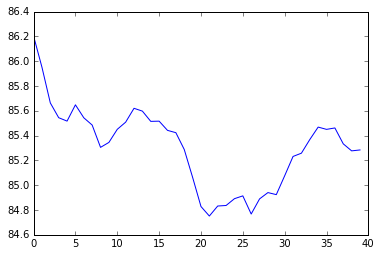

In [14]:
plt.plot(temporal_mean)

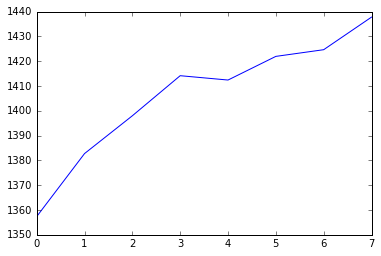

In [15]:
plt.plot(temporal_var)